 # Machine Learning breast cancer prediction model project using KNN
 
 By Theodore Hanvile Anyika

## Part 1 - Data cleaning

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing,model_selection,neighbors
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')
%matplotlib inline

C:\Users\DANOLAN\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# reading the data
df = pd.read_csv(r'C:\Users\DANOLAN\Desktop\DSN machine learning\breast-cancer-wisconsin.data')

# INFO
# DESCRIPTION: This breast cancer database was obtained from the university of wiscousin Hospitals, Madison from DR. William H
#              It contains information on wether a tumor is malignant or not, given a set of attributes.
# Title: Wiscousin Breast Cancer Database (January 8, 1991).
# Sources: 
#          --DR. William H (physician)
#          University of Wiscousin Hospitals
#          Madison, Wiscousin
#          USA
#          -- Donor: Olvi Mangasarian (mangasarian@cs.wisc.edu)
#          Recieved by David W. Aha (aha@jhu.edu)
# Number of instances: 699
# Number of attributes: 10
#   Attribute                    Domain
# ----------------------------------------
#   1. id                        ID number
#   2. clump_thickness           1-10
#   3. unif_cell_size            1-10
#   4. unif_cell_shape           1-10
#   5. marg_adhension            1-10
#   6. single_epith_cell_size    1-10
#   7. bare_nuclei               1-10
#   8. bland_chorm               1-10
#   9. norm_nucleoli             1-10
#   10. mitoses                  1-10
# Class: (2 benign, 4 for malignant)
# Missing values: 16
# NOTE: Missing values are represented with '?'

# replacing '?' with np.nan
df.replace('?',np.nan, inplace=True)
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhension,single_epith_cell_size,bare_nuclei,bland_chorm,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.info()   # checking the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marg_adhension          699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             683 non-null    object
 7   bland_chorm             699 non-null    int64 
 8   norm_nucleoli           699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 57.4+ KB


First we visualize the entire data in a single glance using a seaborn heatmap to spot missing values easily

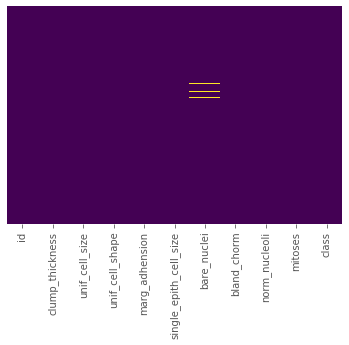

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')  # creating heatmap using seaborn

Only a small faction of the total rows have missing values so it's safe to drop the missing data.

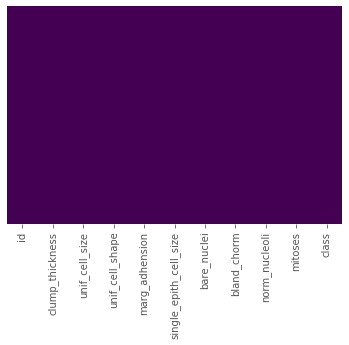

In [4]:
df.dropna(inplace=True)  # dropping rows with missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')  # creating heatmap using seaborn

In [5]:
pd.options.display.max_rows = None  # removing the max number of visible rows in a dataframe
df.index = [i for i in range(683)]  # renaming the indices in accordingly 

df.info()  # checking the info of rhe data frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      683 non-null    int64 
 1   clump_thickness         683 non-null    int64 
 2   unif_cell_size          683 non-null    int64 
 3   unif_cell_shape         683 non-null    int64 
 4   marg_adhension          683 non-null    int64 
 5   single_epith_cell_size  683 non-null    int64 
 6   bare_nuclei             683 non-null    object
 7   bland_chorm             683 non-null    int64 
 8   norm_nucleoli           683 non-null    int64 
 9   mitoses                 683 non-null    int64 
 10  class                   683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 61.4+ KB


In [6]:
# Converting the values in df[bare_nuclei] to integers
for i in range(len(df['bare_nuclei'])):
    df.loc[i,'bare_nuclei'] = int(df.loc[i,'bare_nuclei'])


## part 2 - EDA

In [8]:
def class_name(class_ID):
    '''
    Converts the values in the class column of df from numerical identification to the actual name of the class.
    Malignant in place of 4 and benign in place of 2.
    
    Args:
        class_ID (int): Accepts an integer
        
    return (str): 
        returns malignant if class_ID is equal to 4 and benign if class_ID is equal to 2
    '''
    
    if class_ID == 2:
        return 'benign'
    elif class_ID == 4:
        return 'malignant'
    
df['class_name'] = df['class'].apply(class_name)  # creating a new column using the class_name function
df.drop(['id'],inplace=True,axis=1)

In [11]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhension,single_epith_cell_size,bare_nuclei,bland_chorm,norm_nucleoli,mitoses,class,class_name
0,5,1,1,1,2,1,3,1,1,2,benign
1,5,4,4,5,7,10,3,2,1,2,benign
2,3,1,1,1,2,2,3,1,1,2,benign
3,6,8,8,1,3,4,3,7,1,2,benign
4,4,1,1,3,2,1,3,1,1,2,benign


In [12]:
def plot_attributes(plot_type,data_,label):
    
    '''
    Creates Nine (9) subplots for all nine (9) respective attributes. In each subplot, a certain categorical plot_type is
    made by plotting an attribute column against the categorical class_name column.
    
    Args:
        plot_type(str): A categorical seaborn plot type is specified here.
        
        data_(DataFrame): The DataFrame is specified
        
        label (str): The label of the figure
        
    return (axes object):
        Returns nine (9) categorical subplots.
    
    '''
    
    
    fig,axes = plt.subplots(nrows=3,ncols=3)  # creating subplots 
    
    # initializing indices; these indices would be used to index the axes array accordingly
    index1 = 0 
    index2 = 0

    for i in df.columns[0:-2]: # Itirating the respective attributes and creating respective plots on the respective axes
        
        if index1 == 0:
            
            # selecting plot type
            if plot_type == 'barplot':
                sns.barplot(x='class_name',y=i ,data=data_,ax = axes[index1][index2]) 
            elif plot_type == 'boxplot':
                sns.boxplot(x='class_name',y=i ,data=data_,ax = axes[index1][index2]) 
            elif plot_type == 'stripplot':
                sns.stripplot(x='class_name',y=i ,data=data_,ax = axes[index1][index2]) 
            elif plot_type == 'violinplot':
                sns.violinplot(x='class_name',y=i ,data=data_,ax = axes[index1][index2]) 
            else:
                print('INVALID plot type')
            
            index2 += 1

            if index2 > 2:
                index1 =1
                index2 =0
            else:
                pass
            
        elif index1 ==1:
            
            # selecting plot type
            if plot_type == 'barplot':
                sns.barplot(x='class_name',y=i ,data=data_,ax = axes[index1][index2]) 
            elif plot_type == 'boxplot':
                sns.boxplot(x='class_name',y=i ,data=data_,ax = axes[index1][index2]) 
            elif plot_type == 'stripplot':
                sns.stripplot(x='class_name',y=i ,data=data_,ax = axes[index1][index2]) 
            elif plot_type == 'violinplot':
                sns.violinplot(x='class_name',y=i ,data=data_,ax = axes[index1][index2]) 
            else:
                print('INVALID plot type')

            
            index2 += 1

            if index2>2:
                index1=2
                index2 = 0
            else:
                pass
            
        elif index1 == 2:
            
            # selecting plot type
            if plot_type == 'barplot':
                sns.barplot(x='class_name',y=i ,data=data_,ax = axes[index1][index2]) 
            elif plot_type == 'boxplot':
                sns.boxplot(x='class_name',y=i ,data=data_,ax = axes[index1][index2]) 
            elif plot_type == 'stripplot':
                sns.stripplot(x='class_name',y=i ,data=data_,ax = axes[index1][index2]) 
            elif plot_type == 'violinplot':
                sns.violinplot(x='class_name',y=i ,data=data_,ax = axes[index1][index2]) 
            else:
                print('INVALID plot type')

            index2 += 1

            if index2>2:
                pass
            
        else:
            pass

    plt.tight_layout(pad=0.4,h_pad=0.5,w_pad=0.1,rect=(0,0,2.2,2))
    
    # selecting comment
    if plot_type == 'barplot':
        print('{} \nBarplot for each attribute showing malignant of benign average count '.format(label)) 
    elif plot_type == 'boxplot':
        print('{} \nBoxplot for each attribute showing malignant of benign average count '.format(label))
    elif plot_type == 'stripplot':
        print('{} \nStripplot for each attribute showing malignant of benign average count '.format(label))
    elif plot_type == 'violinplot':
        print('{} \nViolinplot for each attribute showing malignant of benign average count '.format(label))
    else:
        print('INVALID plot type')


     

figure 1 
Barplot for each attribute showing malignant of benign average count 


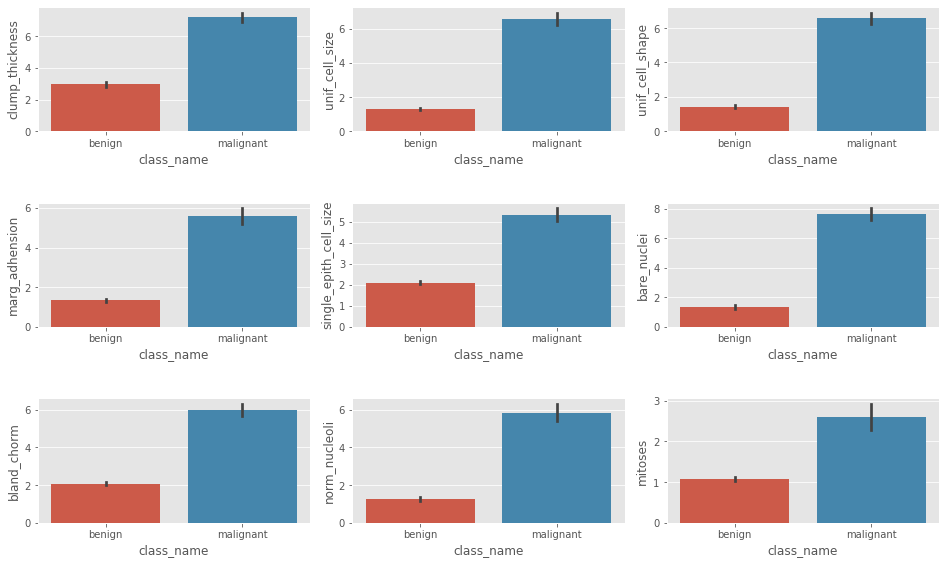

In [13]:
plot_attributes('barplot',df,'figure 1')  # creating barplots of each attribute against the class_name

figure 2 
Stripplot for each attribute showing malignant of benign average count 


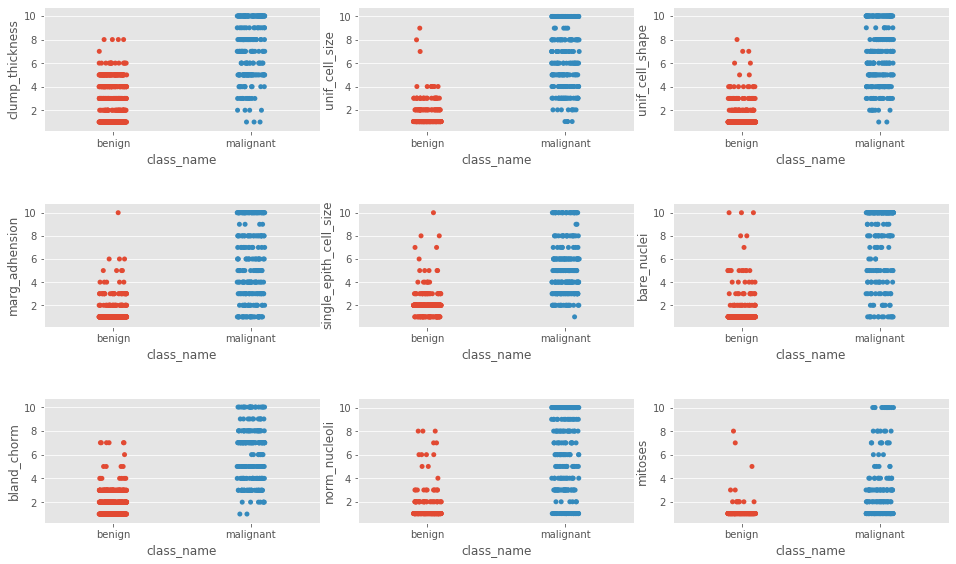

In [32]:
plot_attributes('stripplot',df,'figure 2')  # creating stripplots of each attribute against the class_name

figure 3 
Boxplot for each attribute showing malignant of benign average count 


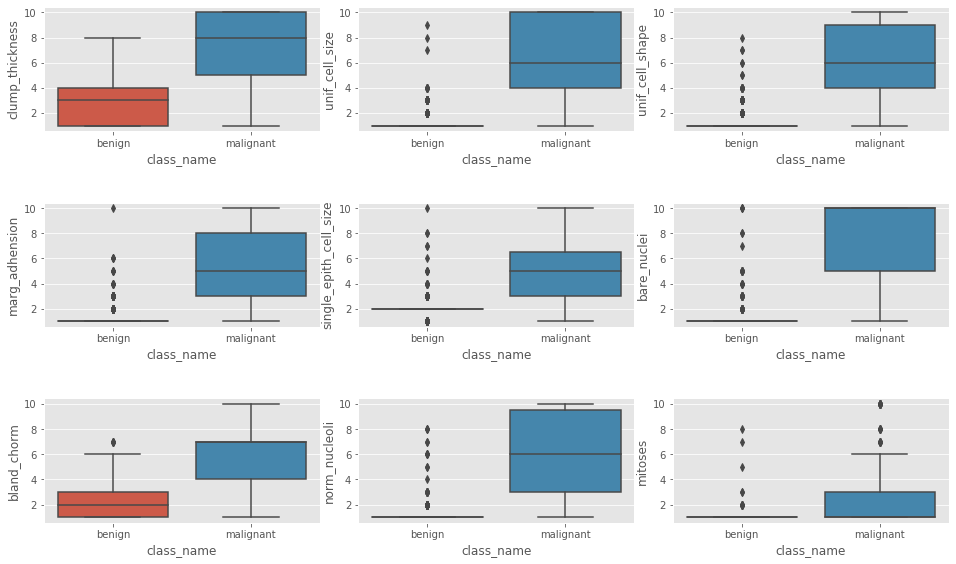

In [33]:
plot_attributes('boxplot',df,'figure 3')  # creating boxplots of each attribute against the class_name

figure 4 
pairplot for each attribute


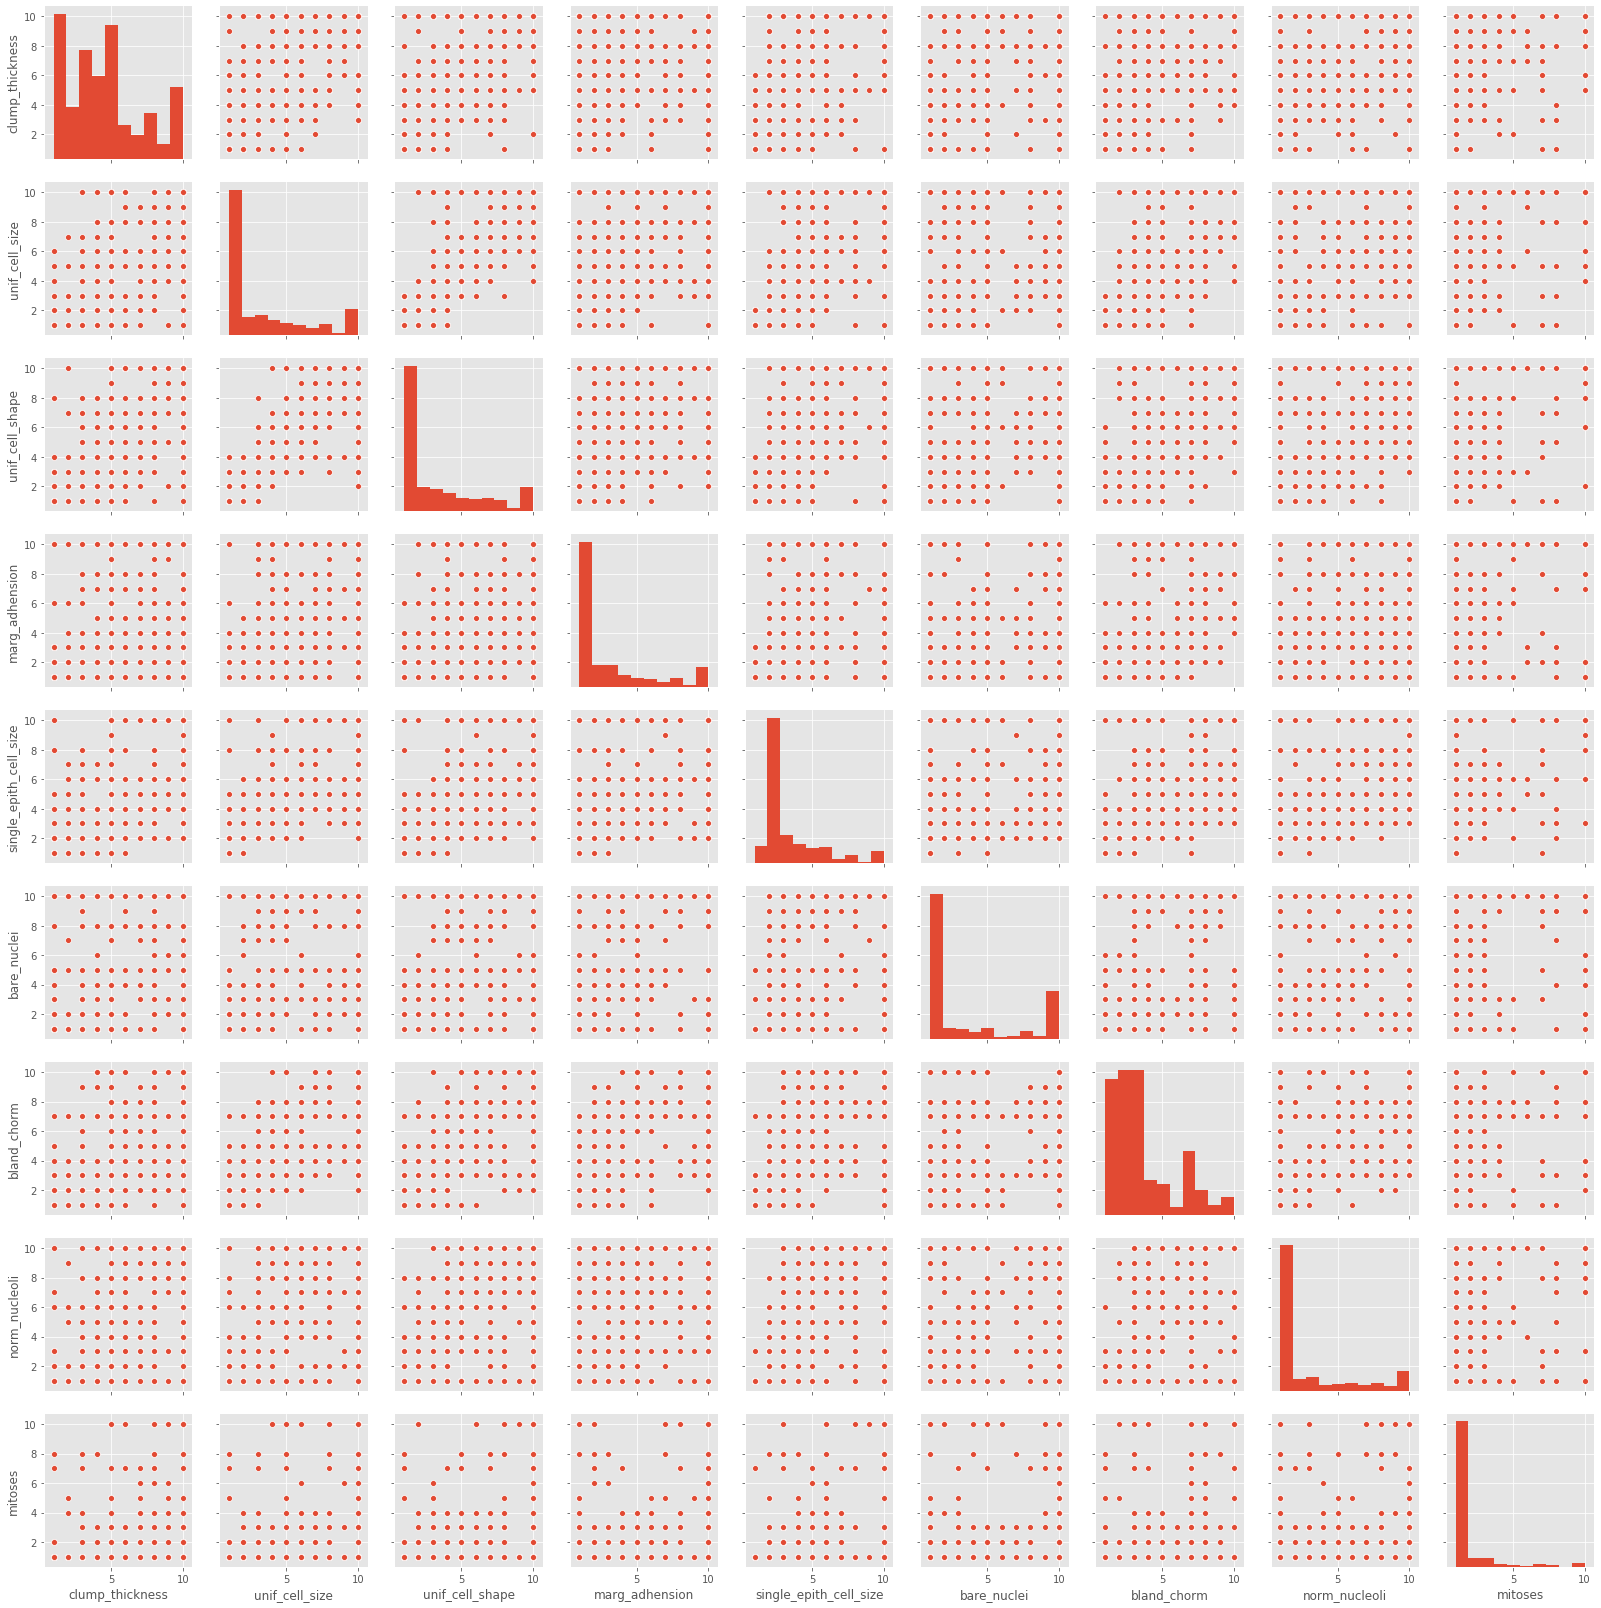

In [34]:
print('figure 4 \npairplot for each attribute')
sns.pairplot(df[df.columns[0:-2]])

# Insights from EDA

-  In figure 1, a barplot was made for each attribute against the categorical class_name. From this figure we can see that<br> 
    for each attribute, the mean values for the benign cases are always much lower than that of the malignant cases. this <br>
    tells us that higher counts for each attribute are more likely to be malignant cases.<br>
    <br><br>
-  In figure 2, we went further to make a stripplot for each attribute against the categorical class_name. From this<br>
    figure we can see that for each attribute, there are a lot less cases of benign class occuring for high value counts.<br>
    At high value counts, cases are more likely to be malignant. This further stregthens our suggestion <br>
    <br><br>
-  Figure 3 shows the distribution of the benign and malignant class for each attribute and it is clear that higher<br>
    counts occur more for malignant class and vice versa for benign class<br>
    <br><br>
-  In figure 4 we went on to investigate the relationship of each attribute with the other and we can see that there seems to      be  no pattern. However figures 1 to 3 tell us clearly that the count for each attribute can be used to determind to<br>
   some degree wether or not a case is benign or malignant<br><br>
    
-  It is safe for us to conclude that all attributes are necessary to train our machine learning model.

# part 3 - Building the Model.

In [11]:
x = np.array(df.drop(['class','class_name'],1))
y = np.array(df['class'])

X_train,x_test,Y_train,y_test = model_selection.train_test_split(x,y, test_size=0.2)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)
accuracy = clf.score(x_test,y_test)

print('The model is {} accurate'.format(str((accuracy*100).round(2))+'%'))

The model is 97.81% accurate


## Thank you!